In [8]:
from knn import KNNClassifier, BatchedKNNClassifier
from knn.distances import euclidean_distance, cosine_distance
from knn.model_selection import knn_cross_val_score
from sklearn import datasets
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import cm
from matplotlib import pyplot as plt
from graph import graph
from experiments import create_classifier, n_random_features
from knn import BatchedKNNClassifier
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

In [9]:
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [10]:
X_train, X_test = X[:60000], X[60001:-1]
Y_train, Y_test = y[:60000], y[60001:-1]

# Эксперимент 1

Сравнить разные алгоритмы со разным количеством случайных признаков.

In [11]:
algorithm_color = {"my_own" : 'm', "ball_tree" : 'b', "brute" : 'r', "kd_tree": 'y'}

In [12]:
def experiment_1(n_features, algorithms, X_train, Y_train, X_test, Y_test):
    result = { algorithm : [] for algorithm in algorithms }
    for n in n_features:
        x_train, x_test, y_train, y_test = n_random_features(n, X_train, Y_train, X_test, Y_test)
        for algorithm in algorithms:
            classifier = create_classifier(algorithm, x_train, y_train)
            time = %timeit -o -q classifier.predict(x_test)
            result[algorithm].append(time)
    return result

In [13]:
x = [10, 20, 100]

In [14]:
result = experiment_1(x, ["my_own", "ball_tree", "brute", "kd_tree"], X_train, Y_train, X_test, Y_test)

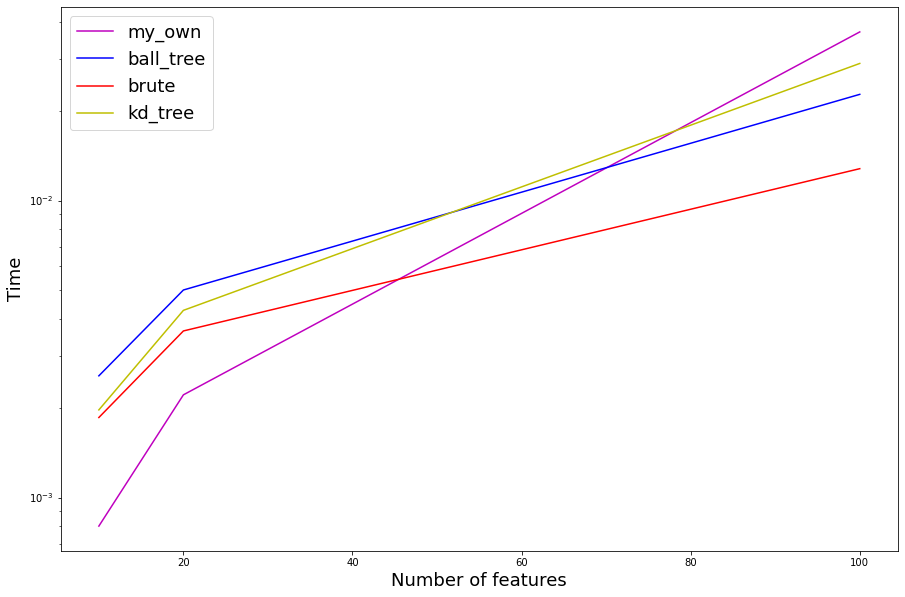

In [16]:
fig, ax = plt.subplots(ncols = 1, nrows = 1,  figsize=(15,10))

for key, value in result.items():
    ax.semilogy(x, [i.average for i in value], algorithm_color[key], label=key)
plt.legend(fontsize=18)
plt.xlabel("Number of features", fontsize=18)
plt.ylabel("Time", fontsize=18)
plt.show()

In [21]:
x = [i for i in range(10,1001)]
result = experiment_1(x, ["my_own", "ball_tree", "brute", "kd_tree"], X_train, Y_train, X_test, Y_test)

In [2]:
fig, ax = plt.subplots(ncols = 1, nrows = 1,  figsize=(15,10))

for key, value in result.items():
    ax.semilogy(x, [i.average for i in value], algorithm_color[key], label=key)
plt.legend(fontsize=18)
plt.xlabel("Number of features", fontsize=18)
plt.ylabel("Time", fontsize=18)
plt.show

NameError: name 'plt' is not defined